In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run ./ODESolvers.py

# Accuracy of ODE solvers

In [3]:
# the ODE
def ft1(t, y):
    return t*y + t**3

# the Exact solution
def yExa(t, y0):
    return (2+y0)*np.exp(0.5*t**2) - t**2 - 2

# initial condition    
y0 = np.array([1])

In [4]:
# number of different sizes of h
L = 10 

# test accuracy
errs_fe = np.zeros(L)
errs_he = np.zeros(L)
errs_rk = np.zeros(L)
h = 0.5**np.linspace(1,L,L)
for i in range(L):
    errs_fe[i],errs_he[i],errs_rk[i] = testAccuracy(ft1, yExa, y0, 2**(i+1))

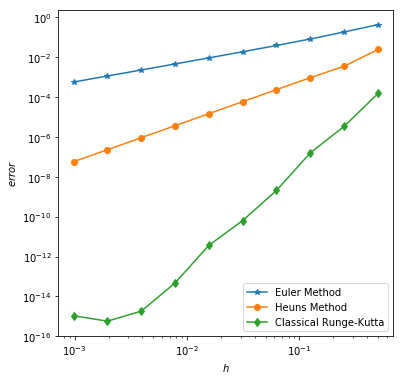

In [5]:
# plot
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.loglog(h, errs_fe,'-*' )
ax.loglog(h, errs_he,'-o' )
ax.loglog(h, errs_rk, '-d')

ax.set_ylabel(r'$error$')
ax.set_xlabel(r'$h$')
ax.legend(['Euler Method', 'Heuns Method', 'Classical Runge-Kutta'])
# reference orders

# Stability

Solve $y'=-\lambda y$ where $\lambda=50$. $y(0)=1$ and $t\in[0,1]$.

In [6]:
# the ODE
def ft2(t, y, la):
    return -la*y
# the Exact solution
def yExa2(t, y0, la):
    return y0*np.exp(-la*t)

In [7]:
# advection coefficient
la = 50
print('Stability criterion for explicit Euler method is h<'+str(2/la))

Stability criterion for explicit Euler method is h<0.04


In [8]:
# Set time step size
h = 0.02

In [9]:
# initial condition    
y0 = np.array([1])

# time span
t_span=(0, 1)
n = np.int32((t_span[1]-t_span[0])/h+1)
t = np.linspace(t_span[0], t_span[1], n)

In [10]:
# Time steps
t_eval = np.linspace(t_span[0], t_span[1], n)

# Exact solution
sol_ex = yExa2(t_eval, y0[0], la)
# Euler Forward
sol_FE = EulerForward(lambda t,y : ft2(t, y, la), t_span, y0, n)
# Euler Backward
sol_BE = EulerBackward(lambda t,y : ft2(t, y, la), t_span, y0, n)

Text(0.5,1,'Implicit Euler with h=0.05, $\\lambda=$50')

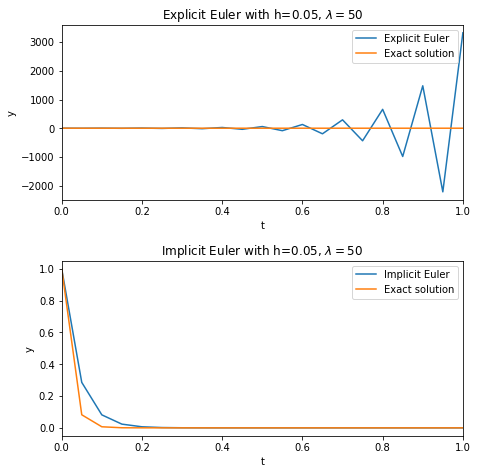

In [12]:
# plot
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout(pad=0, w_pad=0, h_pad=4)

# numerical solutions
axs[0].plot(t_eval, sol_FE[1])
axs[1].plot(t_eval, sol_BE[1])

# analytical solutions
for i in range(2):
    axs[i].plot(t_eval, sol_ex)
    axs[i].set_xlim([t_span[0], t_span[1]])
#     axs[i].set_ylim([0, 1])
    axs[i].set_xlabel('t')
    axs[i].set_ylabel('y')
    
axs[0].legend(['Explicit Euler','Exact solution'])
axs[1].legend(['Implicit Euler','Exact solution'])
axs[0].set_title('Explicit Euler with h=' + str(h) + r', $\lambda=$' + str(la))
axs[1].set_title('Implicit Euler with h=' + str(h) + r', $\lambda=$' + str(la))